### 2-1
矩阵 $R_{\theta}$ 的作用是将向量 $v$ 顺时针旋转 $\theta$ 角。

1


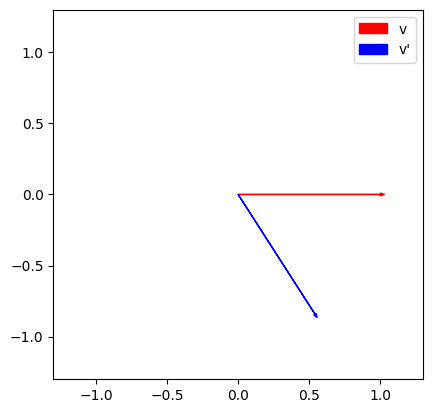

In [1]:
import numpy as np
import matplotlib.pyplot as plt
v=np.array([1,0])
theta=float(input()) # 输入 theta 角度
R_theta=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
vp=np.matmul(R_theta,v)
fig=plt.figure()
sub=fig.add_subplot()
plt.arrow(0,0,v[0],v[1],head_width=0.02,color='r',label='v')
plt.arrow(0,0,vp[0],vp[1],head_width=0.02,color='b',label="v'")
plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)
sub.set_aspect('equal')
plt.legend()
plt.show()

### 2-2
矩阵欧拉公式 $e^{ixP} = \cos(x) I + \mathrm{i}\sin(x) P$ 的证明：

对两边在 0 点展开。左边 Taylor 展开，得到
$$e^{ixP}=\sum\limits_{i=0}^{+\infty} \dfrac{x^i P^i}{i!},$$
注意到 $P$ 是 Pauli 矩阵，从而是酉的、厄米的，即 $P^2=I$。又注意到
$$\cos(x)=1-\dfrac{x^2}{2!}+\dfrac{x^4}{4!}-\cdots,$$
$$\sin(x)=x-\dfrac{x^3}{3!}+\dfrac{x^5}{5!}-\cdots,$$
带入原式不难得证。

以上证明只用到了 $P^2=I$。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def exp_matrix(Mat):
    e,U=np.linalg.eigh(Mat)
    _cos=U @ np.diag(np.cos(e)) @ U.conj().T
    _sin=U @ np.diag(np.sin(e)) @ U.conj().T
    return _cos+1.0j*_sin
X = np.array([[0, 1.0], [1.0, 0]])
Y = np.array([[0,1.0j],[-1.0j,0]])
Z = np.array([[1.0, 0], [0, -1.0]])
theta=float(input())
eX=exp_matrix(theta*X)
_eX=np.cos(theta)*np.eye(2)+np.sin(theta)*1.0j*X
np.testing.assert_allclose(eX,_eX, atol=1e-8)
eY=exp_matrix(theta*Y)
_eY=np.cos(theta)*np.eye(2)+np.sin(theta)*1.0j*Y
np.testing.assert_allclose(eY,_eY, atol=1e-8)
eZ=exp_matrix(theta*Z)
_eZ=np.cos(theta)*np.eye(2)+np.sin(theta)*1.0j*Z
np.testing.assert_allclose(eZ,_eZ, atol=1e-8)

1


### 2-3
以下是计算程序和得到的九个 $\theta\in [-\pi,\pi]$ 时期望的图像。容易看出图像要么是正弦形函数，要么是常数 $0$ 或 $1$（只有 $(P,Q)=(Z,Z)$ 时是 $1$）。

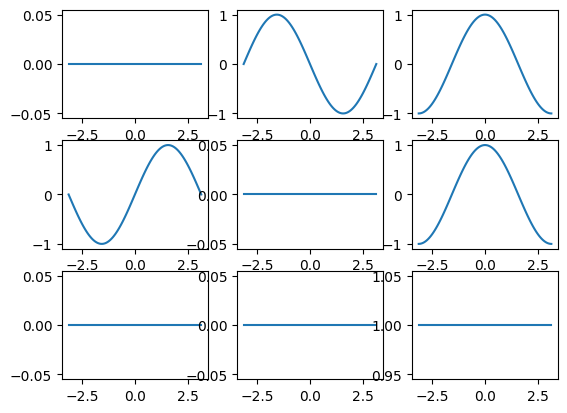

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def exp_matrix(theta,X):
    return np.cos(theta)*np.eye(2)+np.sin(theta)*1.0j*X
X = np.array([[0, 1.0], [1.0, 0]])
Y = np.array([[0,1.0j],[-1.0j,0]])
Z = np.array([[1.0, 0], [0, -1.0]])
A = np.array([X,Y,Z])
v0=np.array([1,0])
# flg=plt.figure()
for op1 in range(3):
    for op2 in range(3):
        th=np.linspace(-np.pi,np.pi,100)
        ans=np.zeros(100)
        for _ in range(100):
            v=np.matmul(exp_matrix(th[_]/2,A[op1]),v0)
            ans[_]=np.real(v.conj().T @ A[op2] @ v)
        plt.subplot(3,3,op1*3+op2+1)
        plt.plot(th,ans)
plt.show()

### 2-4
当输入为 $n$ 时，期望值为 $n$。

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def expectancy(Mat,v):
    return np.real(v.conj().T @ Mat @ v)
n=int(input())
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
Z=np.array([[1,0],[0,-1]])
# first matrix
Z1=ans1=Z
for i in range(n-1):
    Z1=np.kron(Z1,I)
    ans1=np.kron(I,ans1)+Z1
X1=ans2=np.kron(X,X)
for i in range(n-2):
    X1=np.kron(X1,I)
    ans2=np.kron(I,ans2)+X1
H=ans1+ans2
print(H)
v=np.zeros(2**n)
v[0]=1
print("expectancy:",expectancy(H,v))

3
[[ 3  0  0  1  0  0  1  0]
 [ 0  1  1  0  0  0  0  1]
 [ 0  1  1  0  1  0  0  0]
 [ 1  0  0 -1  0  1  0  0]
 [ 0  0  1  0  1  0  0  1]
 [ 0  0  0  1  0 -1  1  0]
 [ 1  0  0  0  0  1 -1  0]
 [ 0  1  0  0  1  0  0 -3]]
expectancy: 3.0


### 2-5
$\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)=(0,0,\frac{1}{\sqrt{2}},0,0,\frac{1}{\sqrt{2}},0,0)^T.$

### 3-1
若 $f(a,b)=a^2+b^2+2ab+3a+4b$，则在 $(a,b)=(0.2,0.5)$ 时，$f(a,b)$ 关于 $a,b$ 的偏导分别约为 $4.4,5.4$。

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc
import tensorflow as tf

K = tc.set_backend("tensorflow")

def f(x):
    a,b=x[0],x[1]
    return a**2+b**2+2*a*b+3*a+4*b
g=K.grad(f)
print(g(K.convert_to_tensor([0.2,0.5])))

tf.Tensor([4.4 5.4], shape=(2,), dtype=float32)


### 3-2
注意对 $f$ 进行 $x,y$ 轴平移和缩放均不影响 $\tau$ 与 $\delta$ 的关系，故只需研究 $A=1,B=C=0$ 的情形。

当 $f(x)=\sin x$ 时，等式 $f'(x)=\dfrac{f(x+\delta)-f(x-\delta)}{\tau}$ 表明
$$\cos x=\dfrac{\sin(x+\delta)-\sin(x-\delta)}{\tau}=\cos x\cdot \dfrac{2\sin \delta}{\tau},$$
故 $\tau=2\sin \delta$。

### 3-3
在 2-3 中已经计算了所有可能情况的 $f(\theta)$，均为 $A\sin (x+B)+C$ 的形式，所以参数平移的估计是准确的。$f(\theta)$ 具有周期 $2\pi$。

### 3-4

In [15]:
import numpy as np
import tensorcircuit as tc
import tensorflow as tf

K = tc.set_backend("tensorflow")

def exp_matrix(theta,O):
    F_1 = K.cast(tc.backend.cos(theta),"complex64")*tc.backend.eye(2)
    F_2 = K.cast(tc.backend.sin(theta),"complex64")*1.0j*O
    return F_1+F_2
X = tc.gates._x_matrix  
Y = tc.gates._y_matrix 
Z = tc.gates._z_matrix
A = [X,Y,Z]
v0_ = np.array([1,0])
v0 = K.cast(v0_[:,np.newaxis],"complex64")
op1, op2 = 0, 0

def lr():

    # construct the loss
    def loss(param):
        the = param
        v = (exp_matrix(the/2,A[op1]) @ v0)
        return tc.backend.real(tc.backend.transpose(tc.backend.conj(v)) @ A[op2] @ v)

    # we get the jitted function to evaluate loss and its derivatives wrt. param

    loss_and_grad = tc.backend.jit(tc.backend.value_and_grad(loss))

    # setup initial values and optimizers

    weight = tc.backend.implicit_randn()

    if tc.backend.name == "tensorflow":
        import tensorflow as tf

        opt = tc.backend.optimizer(tf.keras.optimizers.Adam(1e-2))
    else:
        raise ValueError("Unsupported backend")

    # gradient descent optimization loop
    maxstep = 1000
    for i in range(maxstep):
        loss, grad = loss_and_grad(weight)
        weight = opt.update(grad, weight)
        if i % 200 == 0 or i == maxstep - 1:
            print("optimized MSE loss after %s round: " % i, tc.backend.numpy(loss))

    final_loss, final_grad = loss_and_grad(weight)
    return tc.backend.numpy(final_loss)

if __name__ == "__main__":
    n = "tensorflow"
    with tc.runtime_backend(n):
        print("~~~~~~~~ using %s backend ~~~~~~~~" % n)
        op1, op2 = [int(x) for x in input().split()]
        print("The minimum value is %f" % lr())

~~~~~~~~ using tensorflow backend ~~~~~~~~
1 2
optimized MSE loss after 0 round:  [[0.8450603]]
optimized MSE loss after 200 round:  [[-0.86876523]]
optimized MSE loss after 400 round:  [[-0.9998739]]
optimized MSE loss after 600 round:  [[-1.]]
optimized MSE loss after 800 round:  [[-1.]]
optimized MSE loss after 999 round:  [[-1.]]
The minimum value is -1.000000


### 4-1

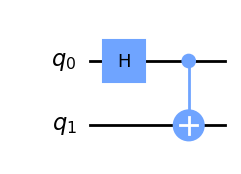

In [13]:
import tensorcircuit as tc
from matplotlib import pyplot as plt

c = tc.Circuit(2)
c.h(0)
c.cnot(0, 1)
c.draw(output="mpl")

In [14]:
print(c.expectation_ps(z=[0,1]))

tf.Tensor((0.99999994+0j), shape=(), dtype=complex64)


### 4-2

### OPT 1
注意到，一共 $N=2^6=64$ 种填数方式，且易知其中有 $M=2$ 个是满足要求的。带入公式，得到
$$R=\lceil\dfrac{\arccos \sqrt{\dfrac{M}{N}}}{2\arccos \sqrt{\dfrac{N-M}{N}}}\rceil=4.$$
以下是 Grover Search 的代码。

In [3]:
import tensorcircuit as tc
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

n = 6

def grover_oracle(c):
    for i in range(0,n,2):
        c.X(i)
    c.multicontrol(*range(n + 1), unitary=tc.gates.x(), ctrl=[1 for _ in range(n)])
    for i in range(n):
        c.X(i)
    c.multicontrol(*range(n + 1), unitary=tc.gates.x(), ctrl=[1 for _ in range(n)])
    for i in range(1,n,2):
        c.X(i)
    return c

def grover_reflection(c):
    for i in range(n):
        c.H(i)
        c.X(i)
    c.multicontrol(*range(n), unitary=tc.gates.z(), ctrl=[1 for _ in range(n - 1)])
    for i in range(n):
        c.X(i)
        c.H(i)
    return c
def grover_algorithm(r):
    c = tc.Circuit(n + 1)
    c.X(n)
    for i in range(n + 1):
        c.H(i)
    for j in range(r):
        c = grover_oracle(c)
        c = grover_reflection(c)
    return c

c = grover_algorithm(4)

print(c.perfect_sampling())

(array([0., 1., 0., 1., 0., 1., 0.], dtype=float32), 0.2497947351765831)


以下是可视化 $R$ 取值为 $0,1,\cdots,19$ 时得到正确答案概率的程序。在量子线路中多加入一个量子比特，用于记录答案是否正确（0 或 1 表示）。最后只需要做一个 multicontrol 即可。

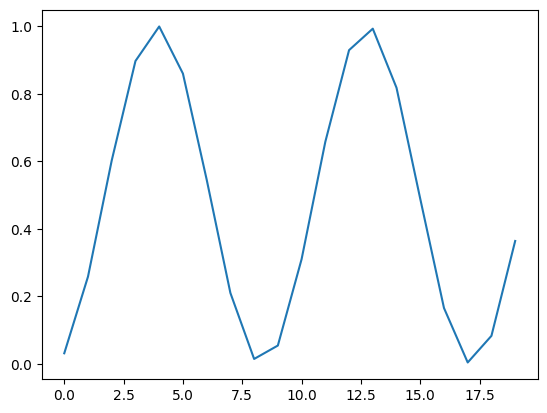

In [4]:
import tensorcircuit as tc
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
# import cotengra

K = tc.set_backend("tensorflow")

# opt = cotengra.ReusableHyperOptimizer(
#     methods=["greedy", "kahypar"],
#     parallel="ray",
#     minimize="combo",
#     max_time=12,
#     max_repeats=1024,
#     progbar=True,
# )
# tc.set_contractor("custom", optimizer=opt, contraction_info=True, preprocessing=True)

n = 6

def grover_oracle(c):
    for i in range(0,n,2):
        c.X(i)
    c.multicontrol(*range(n + 1), unitary=tc.gates.x(), ctrl=[1 for _ in range(n)])
    for i in range(n):
        c.X(i)
    c.multicontrol(*range(n + 1), unitary=tc.gates.x(), ctrl=[1 for _ in range(n)])
    for i in range(1,n,2):
        c.X(i)
    return c

def grover_reflection(c):
    for i in range(n):
        c.H(i)
        c.X(i)
    c.multicontrol(*range(n), unitary=tc.gates.z(), ctrl=[1 for _ in range(n - 1)])
    for i in range(n):
        c.X(i)
        c.H(i)
    return c
def grover_algorithm(r):
    c = tc.Circuit(n + 2)
    c.X(n)
    for i in range(n + 1):
        c.H(i)
    for j in range(r):
        c = grover_oracle(c)
        c = grover_reflection(c)
    # check if we get a correct solution
    for i in range(0,n,2):
        c.X(i)
    c.multicontrol(*(list(range(n)) + list(range(n+1,n+2))), unitary=tc.gates.x(), ctrl=[1 for _ in range(n)])
    for i in range(n):
        c.X(i)
    c.multicontrol(*(list(range(n)) + list(range(n+1,n+2))), unitary=tc.gates.x(), ctrl=[1 for _ in range(n)])
    for i in range(1,n,2):
        c.X(i)
    return c

xlabel = np.arange(20)
ylabel = np.zeros(20)
for num in range(20):
    c = grover_algorithm(num)
    Measured = c.measure(n + 1,with_prob=True)
    if Measured[0].numpy().sum() == 1:
        ylabel[num] = Measured[1].numpy()
    else:
        ylabel[num] = 1.0-Measured[1].numpy()

plt.plot(xlabel,ylabel)
plt.show()

### OPT 2-1

In [7]:
import numpy as np
import tensorcircuit as tc


def lr(xs):

    # construct the loss
    def loss(x, param):
        k = param
        yp = x[0]*(k**3)+x[1]*(k**2)+x[2]*k+x[3]
        return tc.backend.abs(yp)

    # we get the jitted function to evaluate loss and its derivatives wrt. param

    loss_and_grad = tc.backend.jit(tc.backend.value_and_grad(loss, argnums=1))

    # setup initial values and optimizers

    weight = tc.backend.implicit_randn()

    if tc.backend.name == "tensorflow":
        import tensorflow as tf

        opt = tc.backend.optimizer(tf.keras.optimizers.Adam(1e-2))
    else:
        raise ValueError("Unsupported backend")

    # gradient descent optimization loop
    maxstep = 1000
    for i in range(maxstep):
        loss, grad = loss_and_grad(xs, weight)
        weight = opt.update(grad, weight)
        if i % 200 == 0 or i == maxstep - 1:
            print("optimized MSE loss after %s round: " % i, tc.backend.numpy(loss))

    return tc.backend.numpy(weight)


if __name__ == "__main__":
    n = "tensorflow"
    with tc.runtime_backend(n):  # runtime backend switch with context manager
        print("~~~~~~~~ using %s backend ~~~~~~~~" % n)
        xs_tensor = tc.array_to_tensor([float(x) for x in input().split()], dtype="float32")
        print("predicted coefficient", lr(xs_tensor))

~~~~~~~~ using tensorflow backend ~~~~~~~~
1 -3 3 -1
optimized MSE loss after 0 round:  [5.3551884]
optimized MSE loss after 200 round:  [0.18341237]
optimized MSE loss after 400 round:  [0.01906776]
optimized MSE loss after 600 round:  [0.00384855]
optimized MSE loss after 800 round:  [0.00111651]
optimized MSE loss after 999 round:  [0.0004065]
predicted coefficient [0.9260374]


### OPT 2-2

In [8]:
import numpy as np
import tensorcircuit as tc

# (x, y) data preparation

nsamples = 100
xs0 = np.random.uniform(low=-1, high=1, size=[nsamples])
ys0 = np.random.uniform(low=-1, high=1, size=[nsamples])

def lr(xs, ys):

    # construct the loss
    def loss_pointwise(x, y, param):
        X,Y = param["X"], param["Y"]
        now_loss = (x-X)**2 + (y-Y)**2
        return tc.backend.sqrt(now_loss)

    # we suppose this loss function only works for scalar, so that we can show the usage of ``vmap``

    loss_vmap = tc.backend.vmap(loss_pointwise, vectorized_argnums=(0, 1))

    # now we define the total loss for all data

    def loss(xs, ys, param):
        losses = loss_vmap(xs, ys, param)
        return tc.backend.sum(losses)

    # we get the jitted function to evaluate loss and its derivatives wrt. param

    loss_and_grad = tc.backend.jit(tc.backend.value_and_grad(loss, argnums=2))

    # setup initial values and optimizers

    weight = {"X": tc.backend.implicit_randn(), "Y": tc.backend.implicit_randn()}

    if tc.backend.name == "tensorflow":
        import tensorflow as tf

        opt = tc.backend.optimizer(tf.keras.optimizers.Adam(1e-2))
    else:
        raise ValueError("Unsupported backend")

    # gradient descent optimization loop
    maxstep = 500
    for i in range(maxstep):
        loss, grad = loss_and_grad(xs, ys, weight)
        weight = opt.update(grad, weight)
        if i % 100 == 0 or i == maxstep - 1:
            print("optimized MSE loss after %s round: " % i, tc.backend.numpy(loss))

    return tc.backend.numpy(weight["X"]), tc.backend.numpy(weight["Y"])


if __name__ == "__main__":
    n = "tensorflow"
    with tc.runtime_backend(n):  # runtime backend switch with context manager
        print("~~~~~~~~ using %s backend ~~~~~~~~" % n)
        xs_tensor, ys_tensor = tc.array_to_tensor(xs0, ys0, dtype="float32")
        print("predicted coefficient", lr(xs_tensor, ys_tensor))

~~~~~~~~ using tensorflow backend ~~~~~~~~
optimized MSE loss after 0 round:  131.76889
optimized MSE loss after 100 round:  83.75969
optimized MSE loss after 200 round:  82.963615
optimized MSE loss after 300 round:  82.96352
optimized MSE loss after 400 round:  82.9635
optimized MSE loss after 499 round:  82.9635
predicted coefficient (array([0.03217317], dtype=float32), array([-0.02085754], dtype=float32))


### OPT 2-3
相比前两个任务，梯度下降在寻找拟合直线时显得较为不精确，以下将迭代次数调整为 $3000$ 才让结果变得精确。

In [11]:
import numpy as np
import tensorcircuit as tc

# (x, y) data preparation

nsamples = 25
k0 = 1.14
b0 = 5.14

xs0 = np.random.uniform(low=2, high=3, size=[nsamples])
ys0 = k0 * xs0 + b0 + np.random.normal(scale=0.01, size=[nsamples])


def lr(xs, ys):

    # construct the loss
    def loss_pointwise(x, y, param):
        k, b = param["k"], param["b"]
        yp = k * x + b
        return tc.backend.abs(yp - y) / tc.backend.sqrt(k**2 + 1.)

    # we suppose this loss function only works for scalar, so that we can show the usage of ``vmap``

    loss_vmap = tc.backend.vmap(loss_pointwise, vectorized_argnums=(0, 1))

    # now we define the total loss for all data

    def loss(xs, ys, param):
        losses = loss_vmap(xs, ys, param)
        return tc.backend.sum(losses)

    # we get the jitted function to evaluate loss and its derivatives wrt. param

    loss_and_grad = tc.backend.jit(tc.backend.value_and_grad(loss, argnums=2))

    # setup initial values and optimizers

    weight = {"k": tc.backend.implicit_randn(), "b": tc.backend.implicit_randn()}

    if tc.backend.name == "tensorflow":
        import tensorflow as tf

        opt = tc.backend.optimizer(tf.keras.optimizers.Adam(1e-2))
    else:
        raise ValueError("Unsupported backend")

    # gradient descent optimization loop
    maxstep = 3000
    for i in range(maxstep):
        loss, grad = loss_and_grad(xs, ys, weight)
        weight = opt.update(grad, weight)
        if i % 500 == 0 or i == maxstep - 1:
            print("optimized MSE loss after %s round: " % i, tc.backend.numpy(loss))

    return tc.backend.numpy(weight["k"]), tc.backend.numpy(weight["b"])


if __name__ == "__main__":
    n = "tensorflow"
    with tc.runtime_backend(n):  # runtime backend switch with context manager
        print("~~~~~~~~ using %s backend ~~~~~~~~" % n)
        xs_tensor, ys_tensor = tc.array_to_tensor(xs0, ys0, dtype="float32")
        print("predicted coefficient", lr(xs_tensor, ys_tensor))

~~~~~~~~ using tensorflow backend ~~~~~~~~
optimized MSE loss after 0 round:  78.799774
optimized MSE loss after 500 round:  2.9940298
optimized MSE loss after 1000 round:  2.7401576
optimized MSE loss after 1500 round:  2.1948063
optimized MSE loss after 2000 round:  0.6378259
optimized MSE loss after 2500 round:  0.11917505
optimized MSE loss after 2999 round:  0.120837875
predicted coefficient (array([1.1437526], dtype=float32), array([5.128235], dtype=float32))
